In [28]:
import numpy as np
import pandas as pd
import seaborn as sbn
import matplotlib.pyplot as plt
from sklearn.preprocessing import Standard
import warnings
warnings.filterwarnings('ignore')

In [2]:
loan=pd.read_csv('loandata.csv')

In [3]:
loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [18]:
ln=loan.copy()

In [5]:
loan.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [6]:
loan.describe

<bound method NDFrame.describe of       Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001002    Male      No          0      Graduate            No   
1    LP001003    Male     Yes          1      Graduate            No   
2    LP001005    Male     Yes          0      Graduate           Yes   
3    LP001006    Male     Yes          0  Not Graduate            No   
4    LP001008    Male      No          0      Graduate            No   
..        ...     ...     ...        ...           ...           ...   
609  LP002978  Female      No          0      Graduate            No   
610  LP002979    Male     Yes         3+      Graduate            No   
611  LP002983    Male     Yes          1      Graduate            No   
612  LP002984    Male     Yes          2      Graduate            No   
613  LP002990  Female      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849        

In [23]:
#Loan id column is not helpful ,so we can drop 
ln=ln.drop('Loan_ID',axis=1)

In [24]:
ln.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [25]:
#Checking the null values
ln.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

There are null values present in multiple columns

In [31]:
ln.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [22]:
ln['Gender'].unique()

array(['Male', 'Female', nan], dtype=object)

In [9]:
ln['Married'].unique()

array(['No', 'Yes', nan], dtype=object)

In [10]:
ln['Dependents'].unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [11]:
ln['Self_Employed'].unique()

array(['No', 'Yes', nan], dtype=object)

In [12]:
ln['LoanAmount'].unique()

array([ nan, 128.,  66., 120., 141., 267.,  95., 158., 168., 349.,  70.,
       109., 200., 114.,  17., 125., 100.,  76., 133., 115., 104., 315.,
       116., 112., 151., 191., 122., 110.,  35., 201.,  74., 106., 320.,
       144., 184.,  80.,  47.,  75., 134.,  96.,  88.,  44., 286.,  97.,
       135., 180.,  99., 165., 258., 126., 312., 136., 172.,  81., 187.,
       113., 176., 130., 111., 167., 265.,  50., 210., 175., 131., 188.,
        25., 137., 160., 225., 216.,  94., 139., 152., 118., 185., 154.,
        85., 259., 194.,  93., 370., 182., 650., 102., 290.,  84., 242.,
       129.,  30., 244., 600., 255.,  98., 275., 121.,  63., 700.,  87.,
       101., 495.,  67.,  73., 260., 108.,  58.,  48., 164., 170.,  83.,
        90., 166., 124.,  55.,  59., 127., 214., 240.,  72.,  60., 138.,
        42., 280., 140., 155., 123., 279., 192., 304., 330., 150., 207.,
       436.,  78.,  54.,  89., 143., 105., 132., 480.,  56., 159., 300.,
       376., 117.,  71., 490., 173.,  46., 228., 30

In [26]:
ln['Credit_History'].unique()

array([ 1.,  0., nan])

In [27]:
ln['Loan_Amount_Term'].unique()

array([360., 120., 240.,  nan, 180.,  60., 300., 480.,  36.,  84.,  12.])

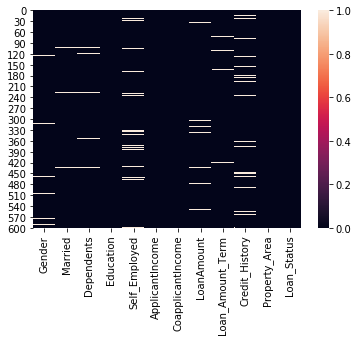

In [30]:
sbn.heatmap(ln.isnull())

In [32]:
#Lets impute the null values 

for cols in ln[['Gender','Married','Dependents','Self_Employed','Credit_History']]:
    ln[cols].fillna(ln[cols].mode()[0],inplace=True)

for cols in ln[['Loan_Amount_Term','LoanAmount']]:
    ln[cols].fillna(ln[cols].mean(),inplace=True)

In [35]:
ln.nunique()

Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           204
Loan_Amount_Term      11
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

In [36]:
for col in ln.columns.values:
    print(ln[col].unique())

['Male' 'Female']
['No' 'Yes']
['0' '1' '2' '3+']
['Graduate' 'Not Graduate']
['No' 'Yes']
[ 5849  4583  3000  2583  6000  5417  2333  3036  4006 12841  3200  2500
  3073  1853  1299  4950  3596  3510  4887  2600  7660  5955  3365  3717
  9560  2799  4226  1442  3750  4166  3167  4692  3500 12500  2275  1828
  3667  3748  3600  1800  2400  3941  4695  3410  5649  5821  2645  4000
  1928  3086  4230  4616 11500  2708  2132  3366  8080  3357  3029  2609
  4945  5726 10750  7100  4300  3208  1875  4755  5266  1000  3333  3846
  2395  1378  3988  2366  8566  5695  2958  6250  3273  4133  3620  6782
  2484  1977  4188  1759  4288  4843 13650  4652  3816  3052 11417  7333
  3800  2071  5316  2929  3572  7451  5050 14583  2214  5568 10408  5667
  2137  2957  3692 23803  3865 10513  6080 20166  2014  2718  3459  4895
  3316 14999  4200  5042  6950  2698 11757  2330 14866  1538 10000  4860
  6277  2577  9166  2281  3254 39999  9538  2980  1863  7933  3089  4167
  9323  3707  2439  2237  8000  1

In [37]:
ln.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

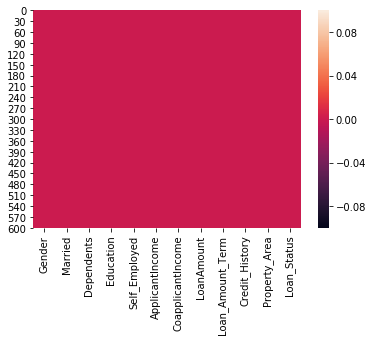

In [39]:
sbn.heatmap(ln.isnull())

In [45]:
ln.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,146.412162,342.000000,0.855049
std,6109.041673,2926.248369,84.037468,64.372489,0.352339
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,129.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [46]:
ln.shape

(614, 12)

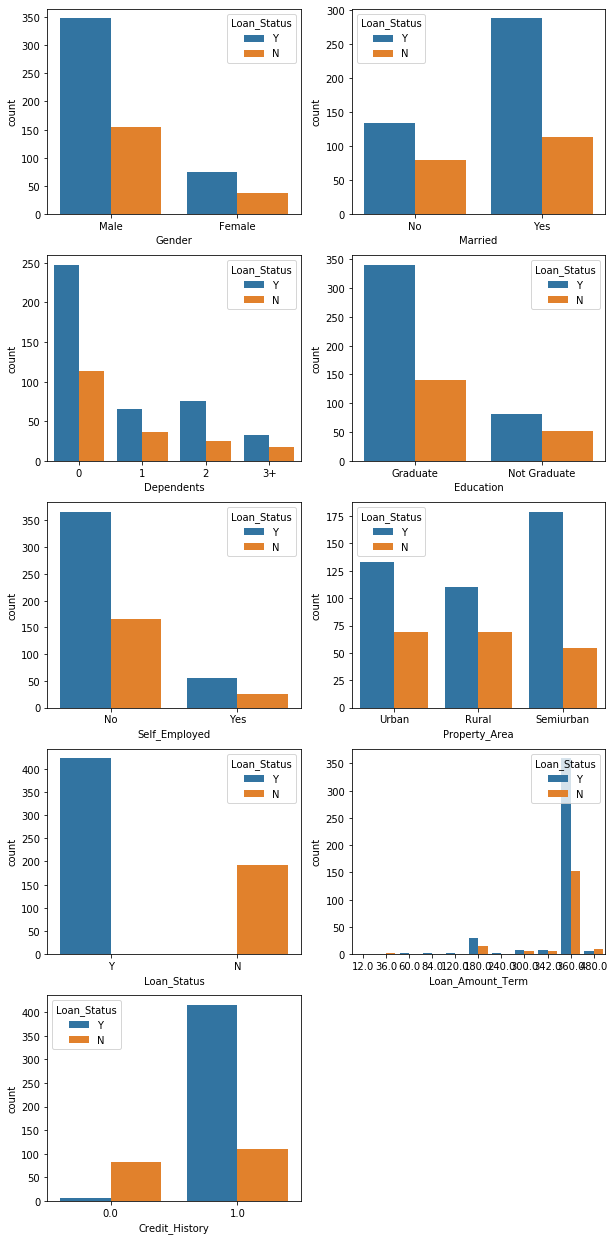

In [52]:
#Visualizing the feature set relation with the label

i=ln[['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status','Loan_Amount_Term','Credit_History']]
plt.figure(figsize=(10,90))
for ci,col in enumerate(i.columns):
    plt.subplot(20,2,ci+1)
    plt.xticks(rotation=360)
    sbn.countplot(x=i[col],data=i,hue='Loan_Status')

In [60]:
grouped=ln.groupby(['Gender','Married','Dependents'])['Loan_Status'].value_counts()

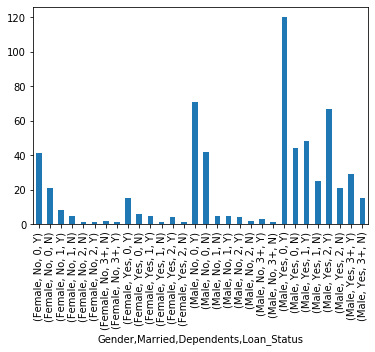

In [63]:
grouped.plot(kind='bar',stacked=True,y='Loan_Status')

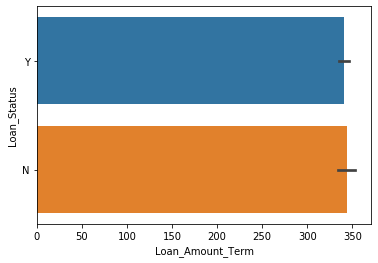

In [68]:
sbn.barplot('Loan_Amount_Term','Loan_Status',data=ln)

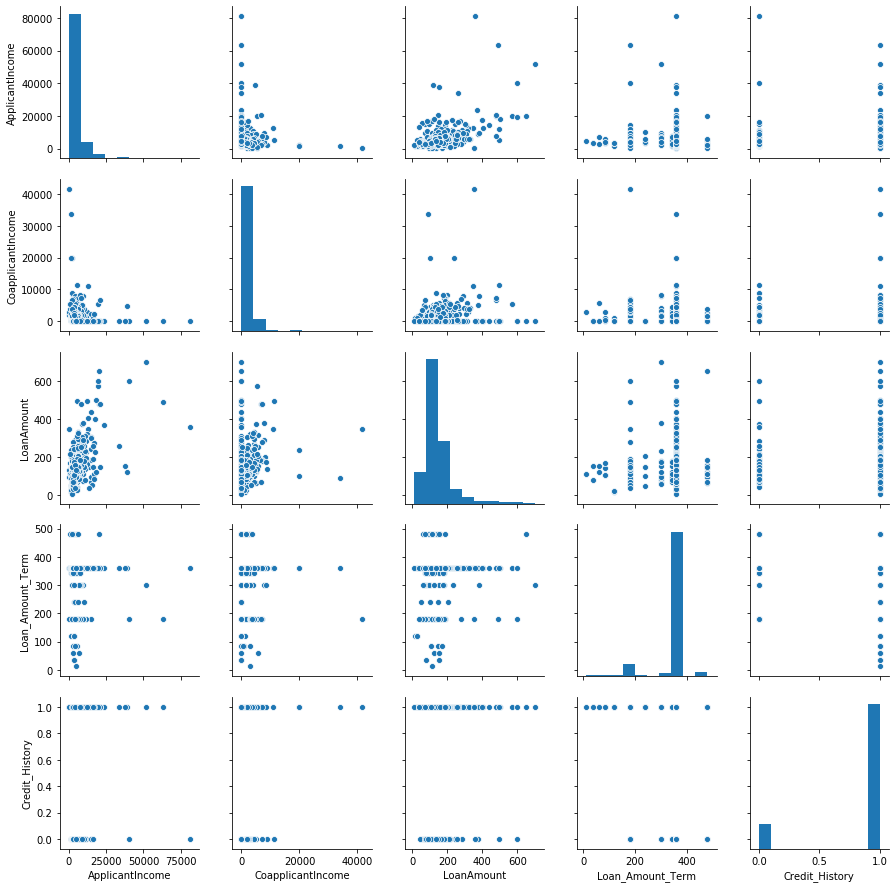

In [70]:
sbn.pairplot(ln)

In [71]:
ln.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


In [135]:

x.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,146.412162,360.0,1.0,1,0,0,0,0,0,0,0,1
1,4583,1508.0,128.000000,360.0,1.0,1,1,1,0,0,0,0,0,0
2,3000,0.0,66.000000,360.0,1.0,1,1,0,0,0,0,1,0,1
3,2583,2358.0,120.000000,360.0,1.0,1,1,0,0,0,1,0,0,1
4,6000,0.0,141.000000,360.0,1.0,1,0,0,0,0,0,0,0,1


In [74]:
ln.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.565620,-0.045242,-0.018615
CoapplicantIncome,-0.116605,1.000000,0.187828,-0.059675,0.011134
LoanAmount,0.565620,0.187828,1.000000,0.038801,-0.001431
Loan_Amount_Term,-0.045242,-0.059675,0.038801,1.000000,0.000432
Credit_History,-0.018615,0.011134,-0.001431,0.000432,1.000000


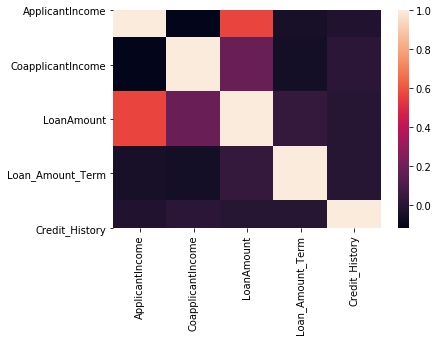

In [75]:
sbn.heatmap(ln.corr())

In [107]:
#looking for skewness

ln.skew()

ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.726601
Loan_Amount_Term    -2.389680
Credit_History      -2.021971
dtype: float64

In [122]:
#Treating skewness
sk=ln[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History']]
for col in sk.columns:
      
    if sk.skew().loc[col]>0.55:
        ln[col]=np.power(ln[col],1/10)
for col in sk.columns:
      if sk.skew().loc[col]<-0.55:

        ln[col]=np.cbrt(ln[col])

In [134]:
ln.skew()

ApplicantIncome      0.505760
CoapplicantIncome   -0.215555
LoanAmount          -0.050822
Loan_Amount_Term    -4.335777
Credit_History      -2.021971
dtype: float64

In [136]:
x=ln.drop('Loan_Status',axis=1)
x=pd.get_dummies(x,drop_first=True)


In [124]:
#Seperating the label

y=ln['Loan_Status']
y.head()

0    Y
1    N
2    Y
3    Y
4    Y
Name: Loan_Status, dtype: object

In [125]:
y=pd.DataFrame(y,columns=['Loan_Status'])
y.head()

,Loan_Status
0,Y
1,N
2,Y
3,Y
4,Y


In [137]:
#Encoding the label
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
ey=le.fit_transform(y)
ey=pd.DataFrame(ey,columns=y.columns)

In [127]:
ey.head()

,Loan_Status
0,1
1,0
2,1
3,1
4,1


In [138]:
#Scaling the feature set
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
scx=sc.fit_transform(x)
scx=pd.DataFrame(scx,columns=x.columns)


In [139]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(scx,y,test_size=.22,random_state=43)



In [84]:
#Importing required packages for the classification

from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score

In [140]:
#Selecting the max accuracy,best random state

def accuracy(model,x,y):
    max_acc=0
    for rst in range(40,100):
        x_train,x_test,y_train,y_test=train_test_split(scx,ey,random_state=rst,test_size=.22)
        model.fit(x_train,y_train)
        predy=model.predict(x_test)
        acc=accuracy_score(y_test,predy)
        print('Accuracy is',acc,'for the random state',rst)
        if acc>max_acc:
            max_acc=acc
            f_rst=rst
    print('Maximum accuracy is ',max_acc,'and acquired at',f_rst)
    return f_rst

In [141]:
lor=LogisticRegression()
accuracy(lor,scx,ey)

Accuracy is 0.8235294117647058 for the random state 40
Accuracy is 0.8014705882352942 for the random state 41
Accuracy is 0.7720588235294118 for the random state 42
Accuracy is 0.8088235294117647 for the random state 43
Accuracy is 0.8382352941176471 for the random state 44
Accuracy is 0.7720588235294118 for the random state 45
Accuracy is 0.8161764705882353 for the random state 46
Accuracy is 0.7941176470588235 for the random state 47
Accuracy is 0.7573529411764706 for the random state 48
Accuracy is 0.8088235294117647 for the random state 49
Accuracy is 0.8014705882352942 for the random state 50
Accuracy is 0.8382352941176471 for the random state 51
Accuracy is 0.8088235294117647 for the random state 52
Accuracy is 0.7867647058823529 for the random state 53
Accuracy is 0.8235294117647058 for the random state 54
Accuracy is 0.75 for the random state 55
Accuracy is 0.8308823529411765 for the random state 56
Accuracy is 0.8014705882352942 for the random state 57
Accuracy is 0.8088235294

63

In [142]:
dt=DecisionTreeClassifier()
accuracy(dt,scx,ey)

Accuracy is 0.6617647058823529 for the random state 40
Accuracy is 0.6911764705882353 for the random state 41
Accuracy is 0.6911764705882353 for the random state 42
Accuracy is 0.7794117647058824 for the random state 43
Accuracy is 0.6985294117647058 for the random state 44
Accuracy is 0.5735294117647058 for the random state 45
Accuracy is 0.7573529411764706 for the random state 46
Accuracy is 0.6764705882352942 for the random state 47
Accuracy is 0.6102941176470589 for the random state 48
Accuracy is 0.6911764705882353 for the random state 49
Accuracy is 0.7573529411764706 for the random state 50
Accuracy is 0.7352941176470589 for the random state 51
Accuracy is 0.7058823529411765 for the random state 52
Accuracy is 0.7720588235294118 for the random state 53
Accuracy is 0.6985294117647058 for the random state 54
Accuracy is 0.6911764705882353 for the random state 55
Accuracy is 0.6985294117647058 for the random state 56
Accuracy is 0.7132352941176471 for the random state 57
Accuracy i

43

In [143]:
kn=KNeighborsClassifier(n_neighbors=3)
accuracy(kn,scx,ey)

Accuracy is 0.75 for the random state 40
Accuracy is 0.75 for the random state 41
Accuracy is 0.75 for the random state 42
Accuracy is 0.7426470588235294 for the random state 43
Accuracy is 0.7867647058823529 for the random state 44
Accuracy is 0.6985294117647058 for the random state 45
Accuracy is 0.7426470588235294 for the random state 46
Accuracy is 0.7794117647058824 for the random state 47
Accuracy is 0.7205882352941176 for the random state 48
Accuracy is 0.75 for the random state 49
Accuracy is 0.7205882352941176 for the random state 50
Accuracy is 0.7794117647058824 for the random state 51
Accuracy is 0.7573529411764706 for the random state 52
Accuracy is 0.7720588235294118 for the random state 53
Accuracy is 0.7352941176470589 for the random state 54
Accuracy is 0.7058823529411765 for the random state 55
Accuracy is 0.7941176470588235 for the random state 56
Accuracy is 0.7279411764705882 for the random state 57
Accuracy is 0.75 for the random state 58
Accuracy is 0.72058823529

97

In [151]:
sv=SVC(kernel='rbf')
accuracy(sv,scx,ey)

Accuracy is 0.8308823529411765 for the random state 40
Accuracy is 0.8161764705882353 for the random state 41
Accuracy is 0.7794117647058824 for the random state 42
Accuracy is 0.8161764705882353 for the random state 43
Accuracy is 0.8455882352941176 for the random state 44
Accuracy is 0.7647058823529411 for the random state 45
Accuracy is 0.8161764705882353 for the random state 46
Accuracy is 0.8014705882352942 for the random state 47
Accuracy is 0.75 for the random state 48
Accuracy is 0.8088235294117647 for the random state 49
Accuracy is 0.7941176470588235 for the random state 50
Accuracy is 0.8382352941176471 for the random state 51
Accuracy is 0.8382352941176471 for the random state 52
Accuracy is 0.7867647058823529 for the random state 53
Accuracy is 0.8308823529411765 for the random state 54
Accuracy is 0.75 for the random state 55
Accuracy is 0.8382352941176471 for the random state 56
Accuracy is 0.7867647058823529 for the random state 57
Accuracy is 0.8088235294117647 for the

63

In [145]:
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier(n_estimators=5)
accuracy(rf,scx,ey)

Accuracy is 0.7647058823529411 for the random state 40
Accuracy is 0.7720588235294118 for the random state 41
Accuracy is 0.7647058823529411 for the random state 42
Accuracy is 0.7794117647058824 for the random state 43
Accuracy is 0.7867647058823529 for the random state 44
Accuracy is 0.7058823529411765 for the random state 45
Accuracy is 0.7867647058823529 for the random state 46
Accuracy is 0.75 for the random state 47
Accuracy is 0.6985294117647058 for the random state 48
Accuracy is 0.7794117647058824 for the random state 49
Accuracy is 0.7720588235294118 for the random state 50
Accuracy is 0.7720588235294118 for the random state 51
Accuracy is 0.7867647058823529 for the random state 52
Accuracy is 0.7426470588235294 for the random state 53
Accuracy is 0.8014705882352942 for the random state 54
Accuracy is 0.7132352941176471 for the random state 55
Accuracy is 0.8308823529411765 for the random state 56
Accuracy is 0.7794117647058824 for the random state 57
Accuracy is 0.7720588235

56

In [146]:
cvs=cross_val_score(lor,scx,ey,cv=5,scoring='accuracy')
print('mean accuracy of logistic regression is ',cvs.mean())
print('Standard deviation of the model is ',cvs.std())


mean accuracy of logistic regression is  0.8095716552088842
Standard deviation of the model is  0.02850615979753853


In [153]:
#Fitting the best model

x_train,x_test,y_train,y_test=train_test_split(scx,ey,random_state=63,test_size=.22)
lor.fit(x_train,y_train)
predy=lor.predict(x_test)
acc=accuracy_score(y_test,predy)
print('Accuracy is ',accuracy_score(y_test,predy))
print('Confusion matrix for the model',confusion_matrix(y_test,predy))
print('Classification report',classification_report(y_test,predy))

Accuracy is  0.8676470588235294
Confusion matrix for the model [[22 17]
 [ 1 96]]
Classification report               precision    recall  f1-score   support

           0       0.96      0.56      0.71        39
           1       0.85      0.99      0.91        97

    accuracy                           0.87       136
   macro avg       0.90      0.78      0.81       136
weighted avg       0.88      0.87      0.86       136



In [159]:
#Saving predictions and the model
predict=pd.DataFrame(predy,columns=['Loan_Status'])
predict=predict.to_csv('loanstatpredict.csv',index=False)

In [161]:
#Saving the model
import joblib
joblib.dump(lor,'loanstatuspredict.pkl')


['loanstatuspredict.pkl']